In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import pair_confusion_matrix, normalized_mutual_info_score, silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
x, y = digits['data'], digits['target']

In [4]:
x.shape #8x8 img

(1797, 64)

In [5]:
# Let's compare results with scaled data
# it looks a bit worse...
# x= scale(x)

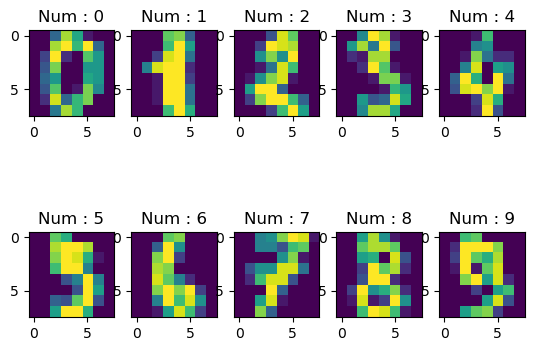

In [6]:
#plotting img

fig, axes = plt.subplots(2,5)
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x[i].reshape(8,8))
    ax.set_title(f'Num : {y[i]}')

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

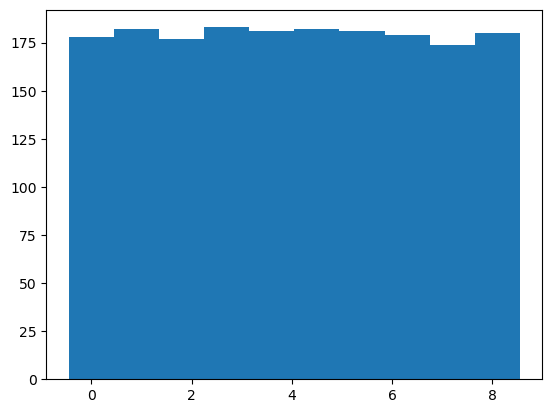

In [7]:
#sample distribution
plt.hist(y, bins=10, align='left')

c:\Users\Thaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



====================___metrics___====================

nmi=0.7411966372679704
sil=0.18257371924537782
ari=0.6643854548114156
triplette=(0.7368642156888113, 0.7455803054329851, 0.7411966372679702)



<Axes: >

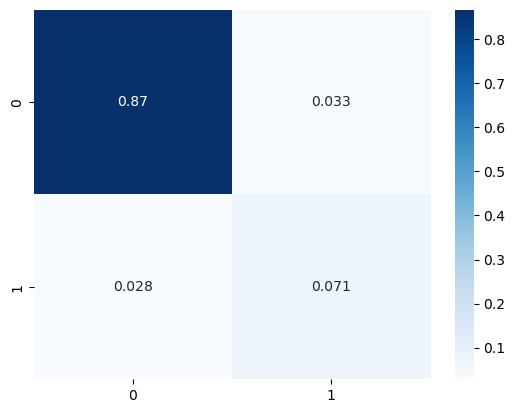

In [8]:
#model
cluster = KMeans(n_clusters=10)
cluster.fit(x)
y_hat = cluster.predict(x)

#eval
nmi = normalized_mutual_info_score(y, y_hat)
print('\n'+20*'='+'___metrics___'+20*'='+'\n')
print(f'{nmi=}')
sil = silhouette_score(x, y_hat)
print(f'{sil=}')
ari = adjusted_rand_score(y,y_hat)
print(f'{ari=}')
triplette = homogeneity_completeness_v_measure(y, y_hat)
print(f'{triplette=}')
print('\n'+50*'=')
pairmatrix = pair_confusion_matrix(y, y_hat)
pairmatrix = pairmatrix /pairmatrix.sum()
sns.heatmap(pairmatrix, annot=True, cbar= True, cmap = 'Blues')

(array([165., 147., 248., 223.,  92., 179., 179., 208., 174., 182.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

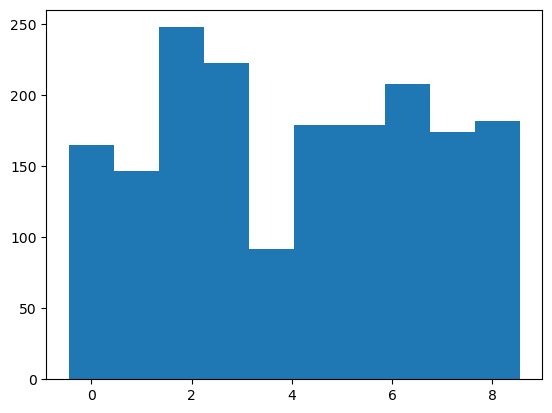

In [9]:
#results distribution
plt.hist(y_hat, bins=10, align='left')
# it looks relatively good for unsupervised learning, though one label seems to be largy missclassed

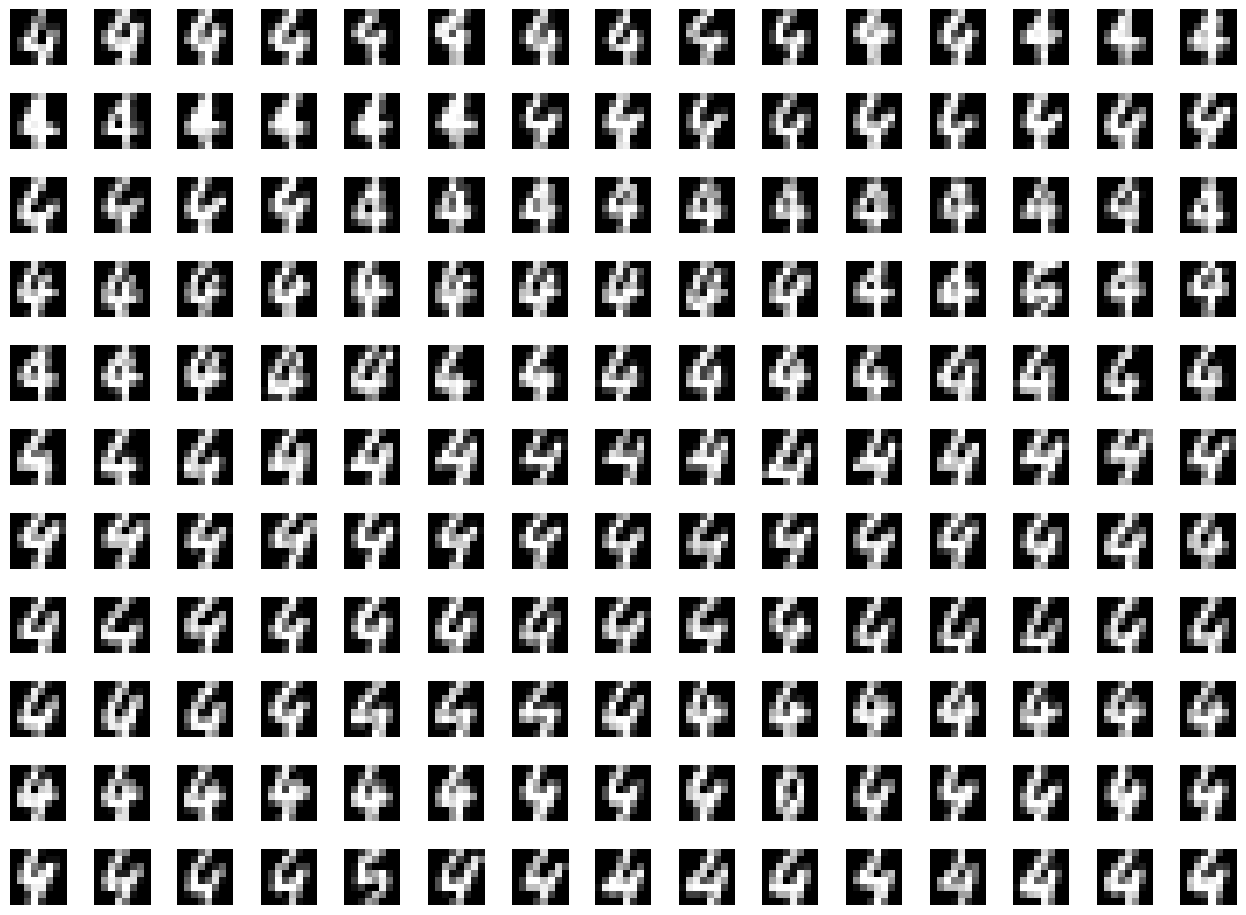

In [10]:
# displaying images within the same cluster to appreciate efficiency, change 0<=n_label<=9 to display a different cluster
pred_labels = cluster.labels_
n_label = 0

fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(hspace=0.5)
plt.gray()
itt=0
for n, label in enumerate(pred_labels):
    if label == n_label:
        ax = plt.subplot(15,15, itt+1 )
        plt.imshow(x[n].reshape(8,8))
        ax.axis('off')
        itt += 1


In [11]:
#Reduction to 2D for data viz using a pipeline
dim = 2
n_digits = len(np.unique(y))
pipe = make_pipeline(PCA(dim), KMeans(n_clusters= n_digits))

y_hat2 = pipe.fit_predict(x)
#thing is, how to extract intermediate results in the pipeline?
#we'll do it sequentially in the meantime


c:\Users\Thaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Thaz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


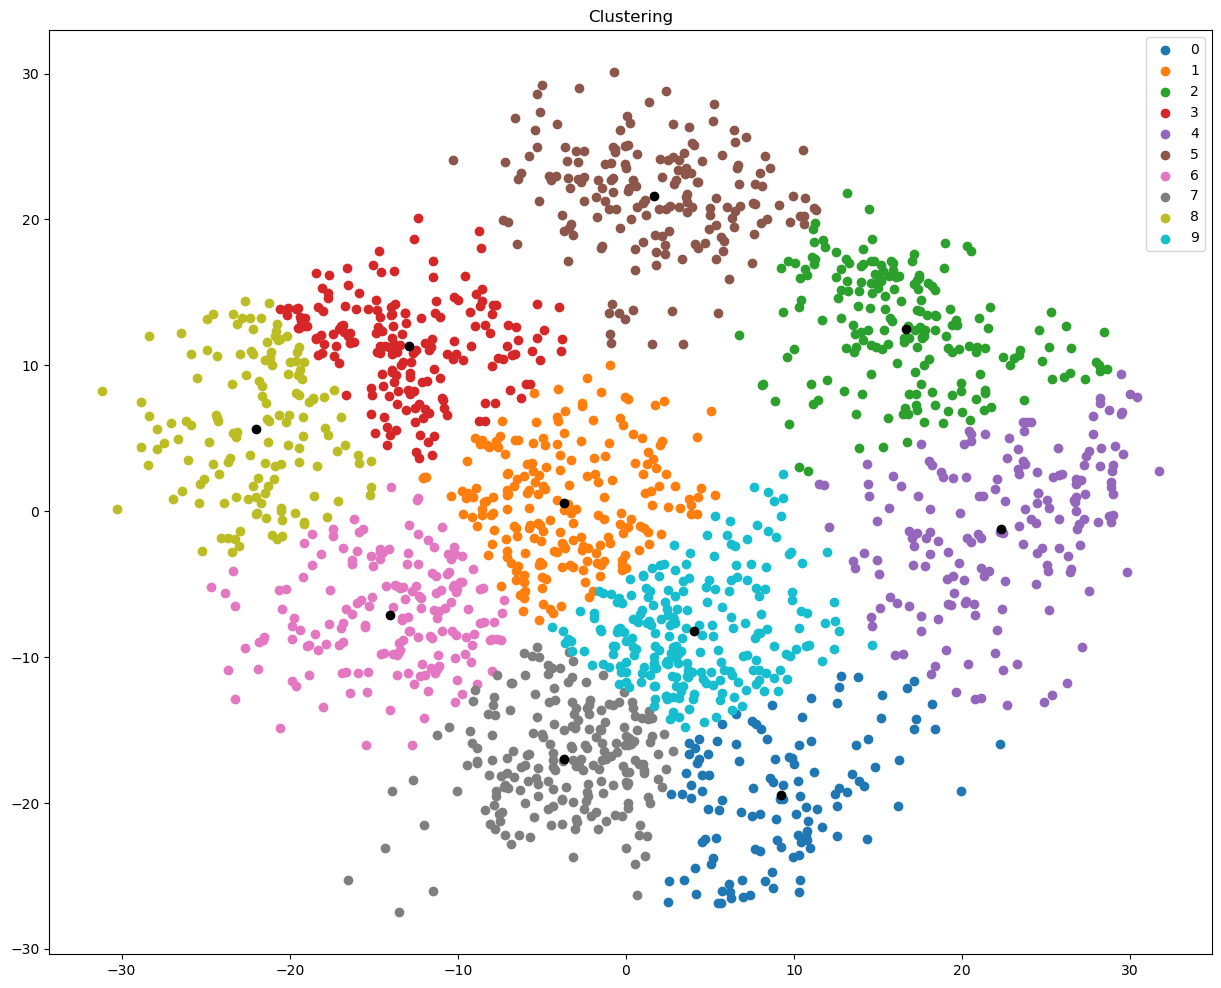

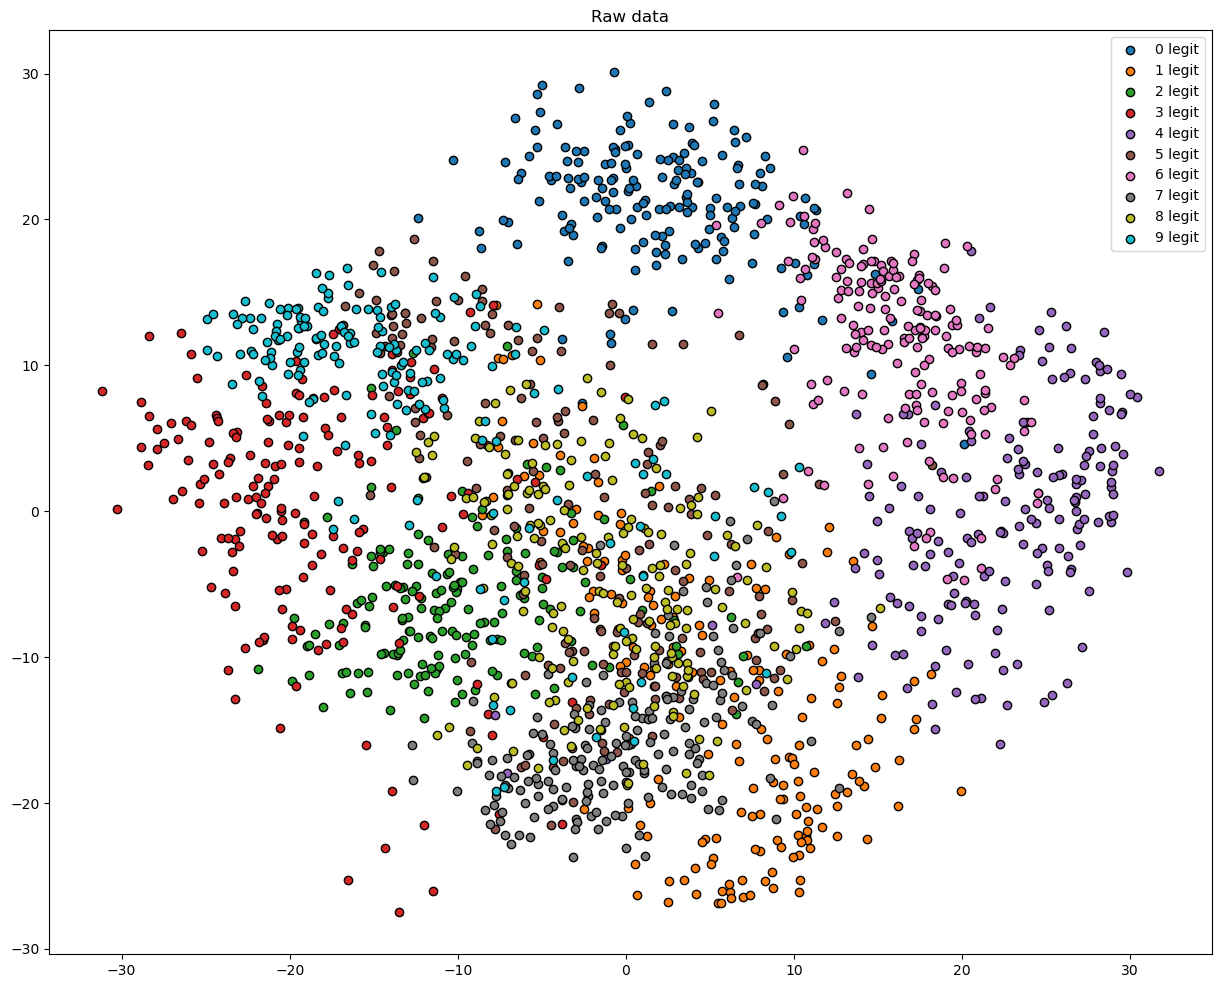

In [12]:
pca = PCA(dim)
kmean = KMeans(n_digits)

x2 = pca.fit_transform(x)
y_hat2 = kmean.fit_predict(x2)
centroid = kmean.cluster_centers_
output_labels = np.unique(y_hat2)

fig = plt.figure(1, figsize=(15,12))

for i in output_labels:
    plt.scatter(x2[y_hat2 == i, 0], x2[y_hat2 ==i ,1], label = i)
    
plt.scatter(centroid[:,0], centroid[:,1], color = 'black')
plt.title('Clustering')
plt.legend()

fig2=plt.figure(2,figsize=(15,12))
for i in output_labels:
    plt.scatter(x2[y == i, 0], x2[y ==i ,1], label = f'{i} legit', edgecolors= 'black')
plt.title('Raw data')
plt.legend()



====================___metrics___====================

nmi=0.5260481667483536
sil=0.393451582965113
ari=0.3946683183344141
triplette=(0.5242921391461438, 0.5278159969145264, 0.5260481667483535)



<Axes: >

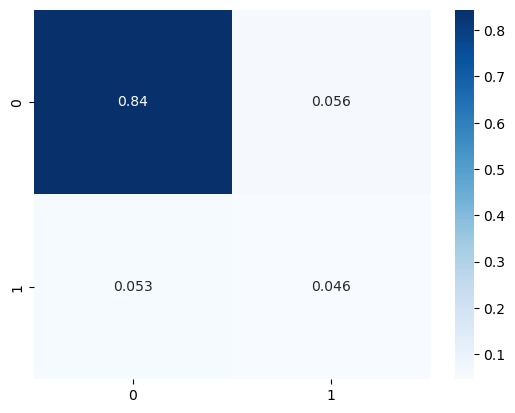

In [13]:
#eval with PCA
nmi = normalized_mutual_info_score(y, y_hat2)
print('\n'+20*'='+'___metrics___'+20*'='+'\n')
print(f'{nmi=}')
sil = silhouette_score(x2, y_hat2)
print(f'{sil=}')
ari = adjusted_rand_score(y,y_hat2)
print(f'{ari=}')
triplette = homogeneity_completeness_v_measure(y, y_hat2)
print(f'{triplette=}')
print('\n'+50*'=')
pairmatrix = pair_confusion_matrix(y, y_hat2)
pairmatrix = pairmatrix /pairmatrix.sum()
sns.heatmap(pairmatrix, annot=True, cbar= True, cmap = 'Blues')
#Reducing dimension seems to be detrimental for clustering performances, looks like it leads to information loss

Overall, Classification algorithms are better suited for such problems with knowledge of ground truth, though clustering algorithms are not so far behind